In [9]:
import math
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
%matplotlib inline

class OneTrack:
    def __init__(self):
        self.Izz = 16840 # Kg.m^2
        self.m = 8600 # Kg
        self.C_alpha_1 = 159000 # N/rad
        self.C_alpha_2 = 159000 # N/rad
        self.WD = 50 #%
        self.wheelbase = 3.1 #m
        
    def run(self, vx_i):
        Izz = self.Izz
        m = self.m
        C_alpha_1 = self.C_alpha_1
        C_alpha_2 = self.C_alpha_2
        wheelbase = self.wheelbase
        WD = self.WD
        a = (1-WD/100) * wheelbase
        b = WD/100 * wheelbase
        vx = vx_i
        
        A = np.array(
            [
                [-(C_alpha_1 + C_alpha_2) / (m * vx),           (-a * C_alpha_1 + b * C_alpha_2) / (m*vx) - vx],
                [-(a * C_alpha_1 - b * C_alpha_2) / (Izz * vx),   -(a**2 * C_alpha_1 + b**2 * C_alpha_2) / (Izz*vx)]
            ]
                    )
        
        B = np.array(
            [
                [C_alpha_1/m],
                [(a * C_alpha_1) / Izz]
            ]
        )
        
        C = np.array(
            [
                [1,0],
                [0,1]
            ]
        )
        
        D = np.array([[0],[0]])
        
        
        sys = signal.StateSpace(A,B,C,D)
        t,y = signal.step(sys)
        return t,y

def step_info(t,yout):
    print("OS: %f%s"%((yout.max()/yout[-1]-1)*100,'%'))
    print("Tr: %fs"%(t[next(i for i in range(0,len(yout)-1) if yout[i]>yout[-1]*.90)]-t[0]))
   # print("Ts: %fs"%(t[next(len(yout)-i for i in range(2,len(yout)-1) if abs(yout[-i]/yout[-1])>1.02)]-t[0]))

OS: 0.000000%
Tr: 0.516295s


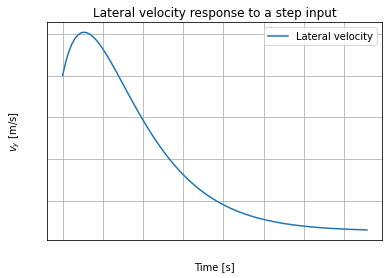

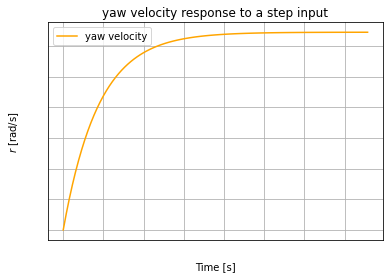

In [10]:
one_t = OneTrack()
t,y = one_t.run(10)

vy = y[:,0]
r = y[:,1]

step_info(t,r)

# Plot lateral velocity
plt.figure()
plt.plot(t,vy)
plt.title("Lateral velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["Lateral velocity"])
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True)

# Plot the yaw rate
plt.figure()
plt.plot(t,r, "orange")
plt.title("yaw velocity response to a step input")
plt.xlabel("Time [s]")
plt.ylabel("$r$ [rad/s]")
plt.legend(["yaw velocity"])
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.grid(True)

In [ ]:
one_t = OneTrack()

ti, vx, yaw_dot_arr, vy_arr, slip_angle_2_arr, slip_angle_1_arr, yaw_dot_dot_arr, ay_arr, Fy_1_arr, Fy_2_arr = bike_truck(10, 0.017,one_t)
# Additional Outputs
corner_radius = vx / yaw_dot_arr
plt.figure()
plt.plot(ti, vy_arr)
plt.xlabel("Time [s]")
plt.ylabel("$v_y$ [m/s]")
plt.legend(["Lateral Velocity vy [m/s]"])
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.figure()
plt.plot(ti, yaw_dot_arr*57)
plt.xlabel("Time [s]")
plt.ylabel("$r$ [deg/s]")
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')


plt.figure()
plt.plot(ti, ay_arr + yaw_dot_arr*vx)
plt.xlabel("Time [s]")
plt.ylabel("$a_y$ [$m/s^2$]")
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')


plt.figure()
plt.plot(ti, slip_angle_1_arr*57)
plt.plot(ti, slip_angle_2_arr*57)
plt.xlabel("Time [s]")
plt.ylabel("[deg]")
plt.legend(["slip_angle_1","slip_angle_2"])
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')


plt.figure()
plt.plot(ti, Fy_1_arr)
plt.plot(ti, Fy_2_arr)
plt.xlabel("Time [s]")
plt.ylabel("[N]")
plt.legend(["Fy_1","Fy_2"])
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.figure()
plt.plot(ti, corner_radius)
plt.xlabel("Time [s]")
plt.ylabel("[m]")
plt.legend(["Corner Radius"])
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

In [ ]:
vx_length = np.arange(2,10,1)
steer_length = np.arange(0.1,0.4,0.01)
ay = np.zeros((vx_length.size, steer_length.size))
corner_radius=np.zeros((vx_length.size, steer_length.size))
v=np.zeros((vx_length.size, steer_length.size))
for i, vx_i in enumerate(vx_length):
    for j, steer in enumerate(steer_length):
        ti, vx, yaw_dot_arr, vy_arr, slip_angle_2_arr, slip_angle_1_arr, yaw_dot_dot_arr, ay_arr, Fy_1_arr, Fy_2_arr = bike_truck(vx_i, steer,one_t)
        corner_radius[i][j] = (vx/yaw_dot_arr[-1])
        ay[i][j] = ay_arr[-1]
        v[i][j] = vx




fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Lateral Acceleration [g]")
ax.set_ylabel("Speed [mph]")
ax.set_zlabel("Corner Radius [m]")
ax.plot_wireframe(ay/9.8, v*3.6/1.6, corner_radius)



vx_length = np.arange(2,10,1)
steer_length = np.arange(0.1,0.4,0.01)
ay = np.zeros((vx_length.size, steer_length.size))
corner_radius=np.zeros((vx_length.size, steer_length.size))
v=np.zeros((vx_length.size, steer_length.size))
for i, vx_i in enumerate(vx_length):
    for j, steer in enumerate(steer_length):
        ti, vx, yaw_dot_arr, vy_arr, slip_angle_2_arr, slip_angle_1_arr, yaw_dot_dot_arr, ay_arr, Fy_1_arr, Fy_2_arr = bike_truck(vx_i, steer, one_t)
        corner_radius[i][j] = (vx/yaw_dot_arr[-1])
        ay[i][j] = ay_arr[-1]
        v[i][j] = vx

ax.plot_wireframe(ay/9.8, v*3.6/1.6, corner_radius, color='orange')